# **<center style="color: green;">Desafío - Preparación de datos y gráficos</center>**

### **Nombre:** Cristian Tobar Morales ###
### **Curso:** Análisis estadístico con Python (G101) ###

## **Descripción**
La base de datos world-data-2023.csv proporciona una gran cantidad de información sobre
todos los países del mundo, abarcando una amplia gama de indicadores y atributos. Incluye
estadísticas demográficas, indicadores económicos, factores ambientales, métricas de
atención médica, estadísticas educativas y mucho más. Con la representación de cada país,
este conjunto de datos ofrece una perspectiva global completa sobre diversos aspectos de
las naciones, lo que permite análisis en profundidad y comparaciones entre países.

# **Actividad N° 1**
Carga los datos y genera un dataFrame que excluya las columnas correspondientes
a la abreviatura del país, código de llamada, capital, código de moneda, ciudad más
grande, lenguaje oficial, latitud y longitud. Considerando estos datos, realiza una
inspección inicial sobre ellos,considerando gráficos. Concluye

## Cargar el DataSet y Exploración inicial
En primer lugar, se seleccionan las columnas relevantes para el análisis y se procede a cargar el archivo CSV, asegurando que únicamente se incluyan las columnas especificadas. Como paso inicial, se visualizan las primeras cinco filas del dataset, lo que permite obtener una vista preliminar de la estructura y contenido de los datos a trabajar.

In [18]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Listas de columnas que quieros mostrar y trabajar
columnas = ['Country', 'Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 
            'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 
            'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP', 
            'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 
            'Infant mortality', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 
            'Out of pocket health expenditure', 'Physicians per thousand', 'Population',
            'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 
            'Unemployment rate', 'Urban_population',]
 
# Cargar el archivo
df = pd.read_csv('data/world-data-2023.csv', usecols=columnas, delimiter=',')

# Mostrar el DataSet
df.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60,58.10%,"652,230","323,000",32.49,"8,672",149.9,2.30%,4.47,...,638.0,$0.43,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273"
1,Albania,105,43.10%,"28,748","9,000",11.78,"4,536",119.05,1.40%,1.62,...,15.0,$1.12,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593"
2,Algeria,18,17.40%,"2,381,741","317,000",24.28,"150,006",151.36,2.00%,3.02,...,112.0,$0.95,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100"
3,Andorra,164,40.00%,468,NaN,7.20,469,NaN,NaN,1.27,...,NaN,$6.63,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873"
4,Angola,26,47.50%,"1,246,700","117,000",40.73,"34,693",261.73,17.10%,5.52,...,241.0,$0.71,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025"


In [11]:
# Dimensiones
df.shape

(195, 27)

In [13]:
# Resumen de la estructura del DataFrame
df.dtypes

Country                                       object
Density\n(P/Km2)                              object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       object
Infant mortality                             float64
Life expectancy                              float64
Maternal mortality ratio                     float64
Minimum wage                                  

## Visualización Inicial

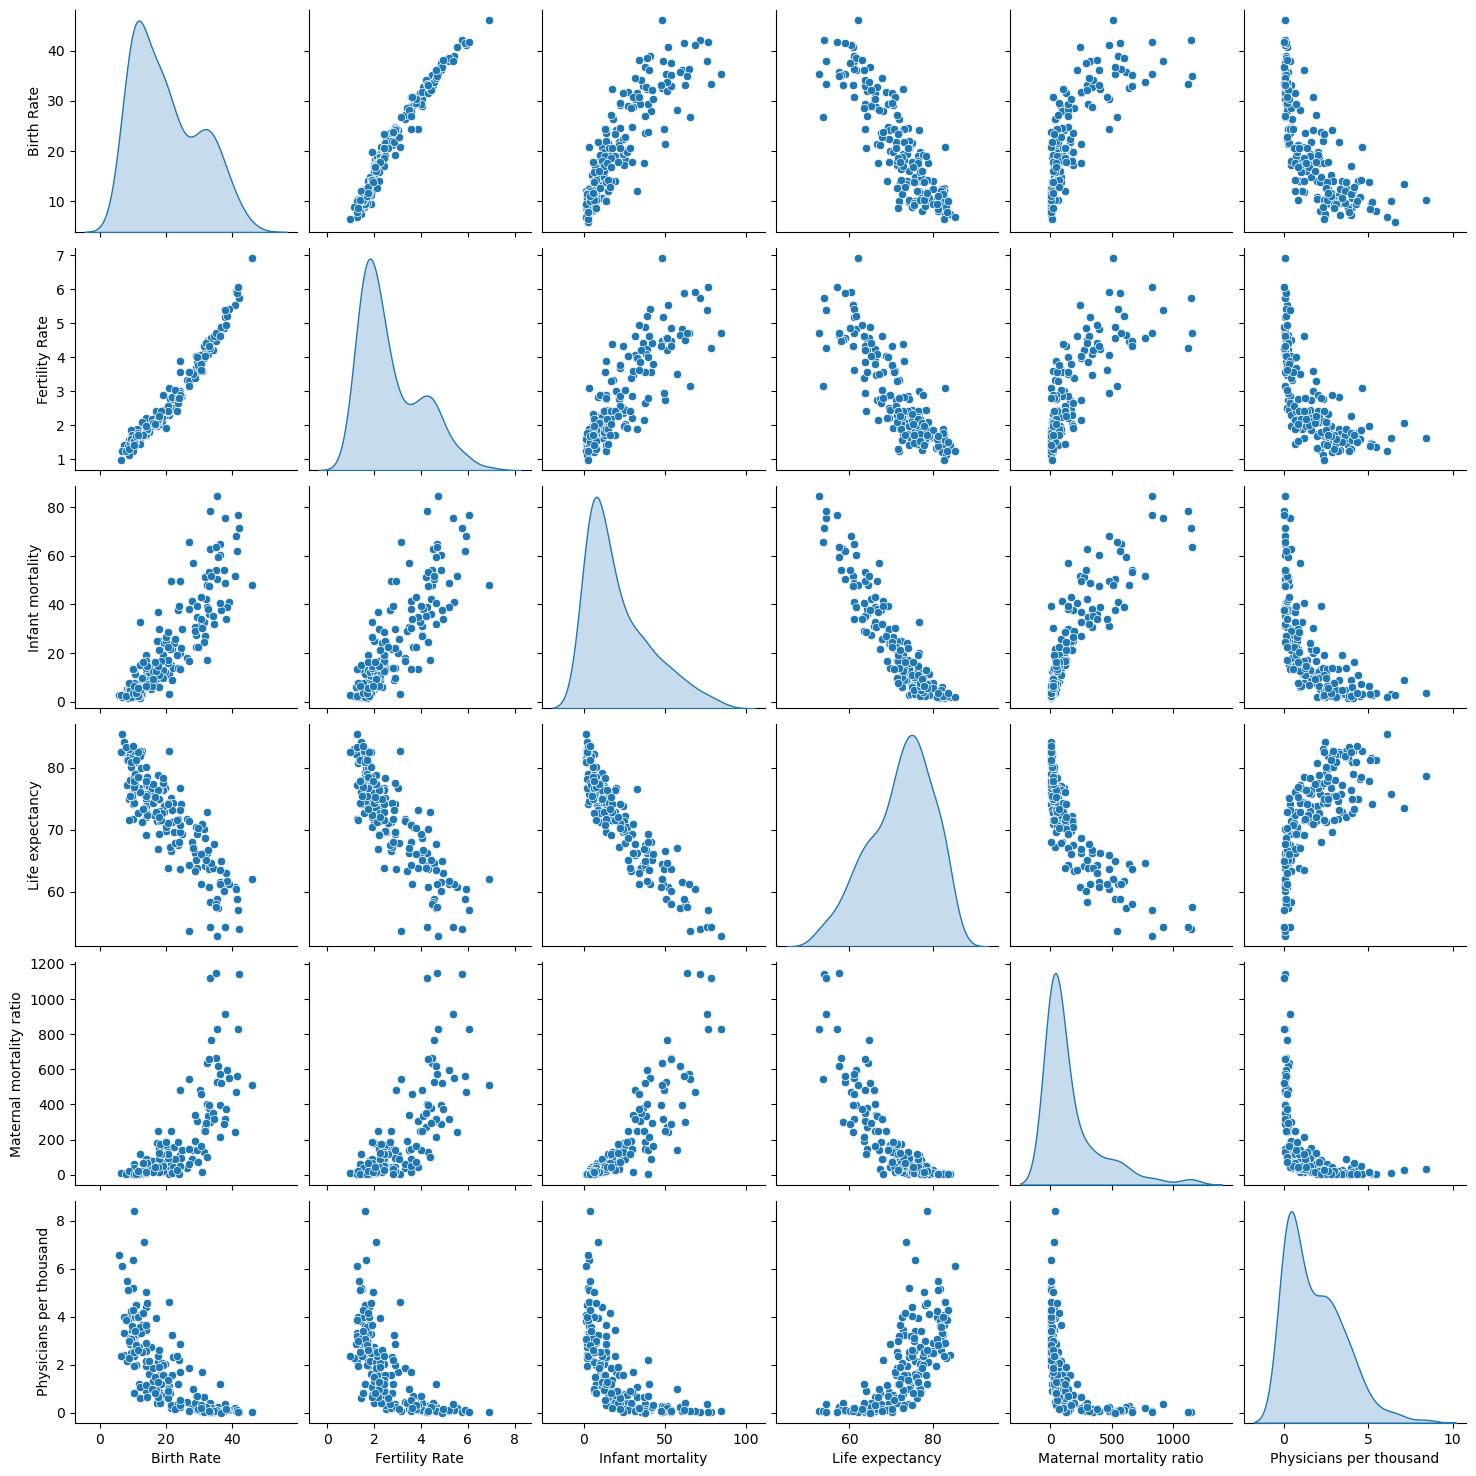

In [17]:
# Se presenta la relación entre la varibales
#  'diag_kind' permite mostrar histogramas de densidad en la diagonal principal
sns.pairplot(df, diag_kind='kde')
plt.show()

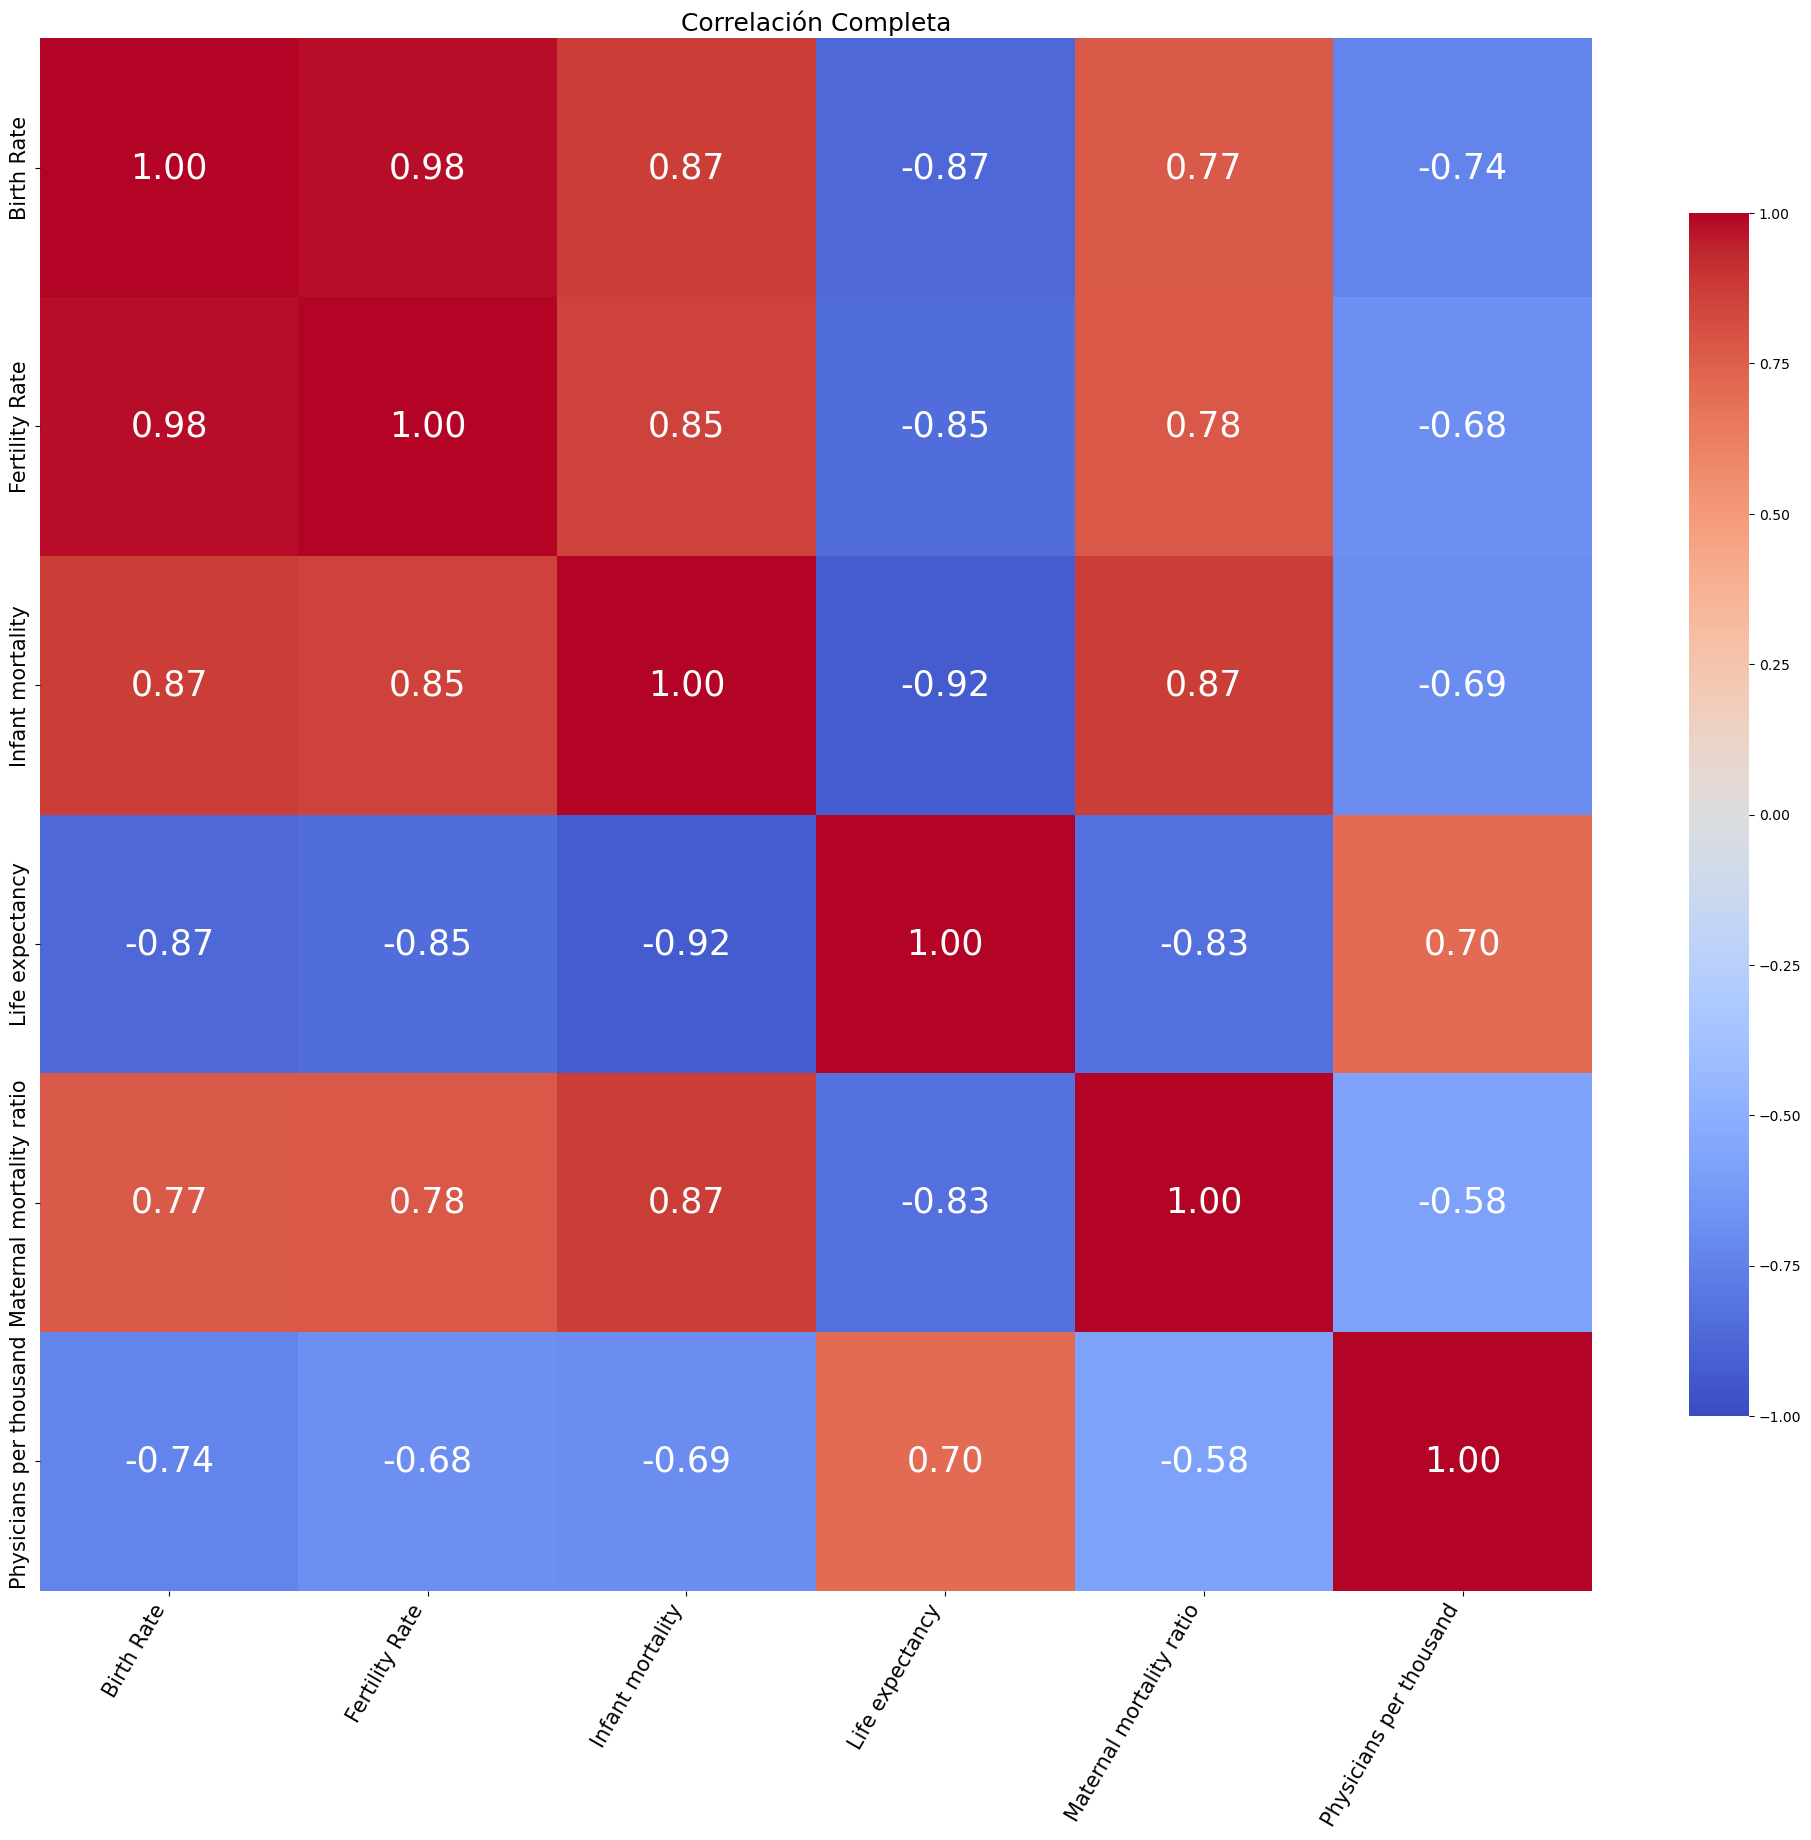

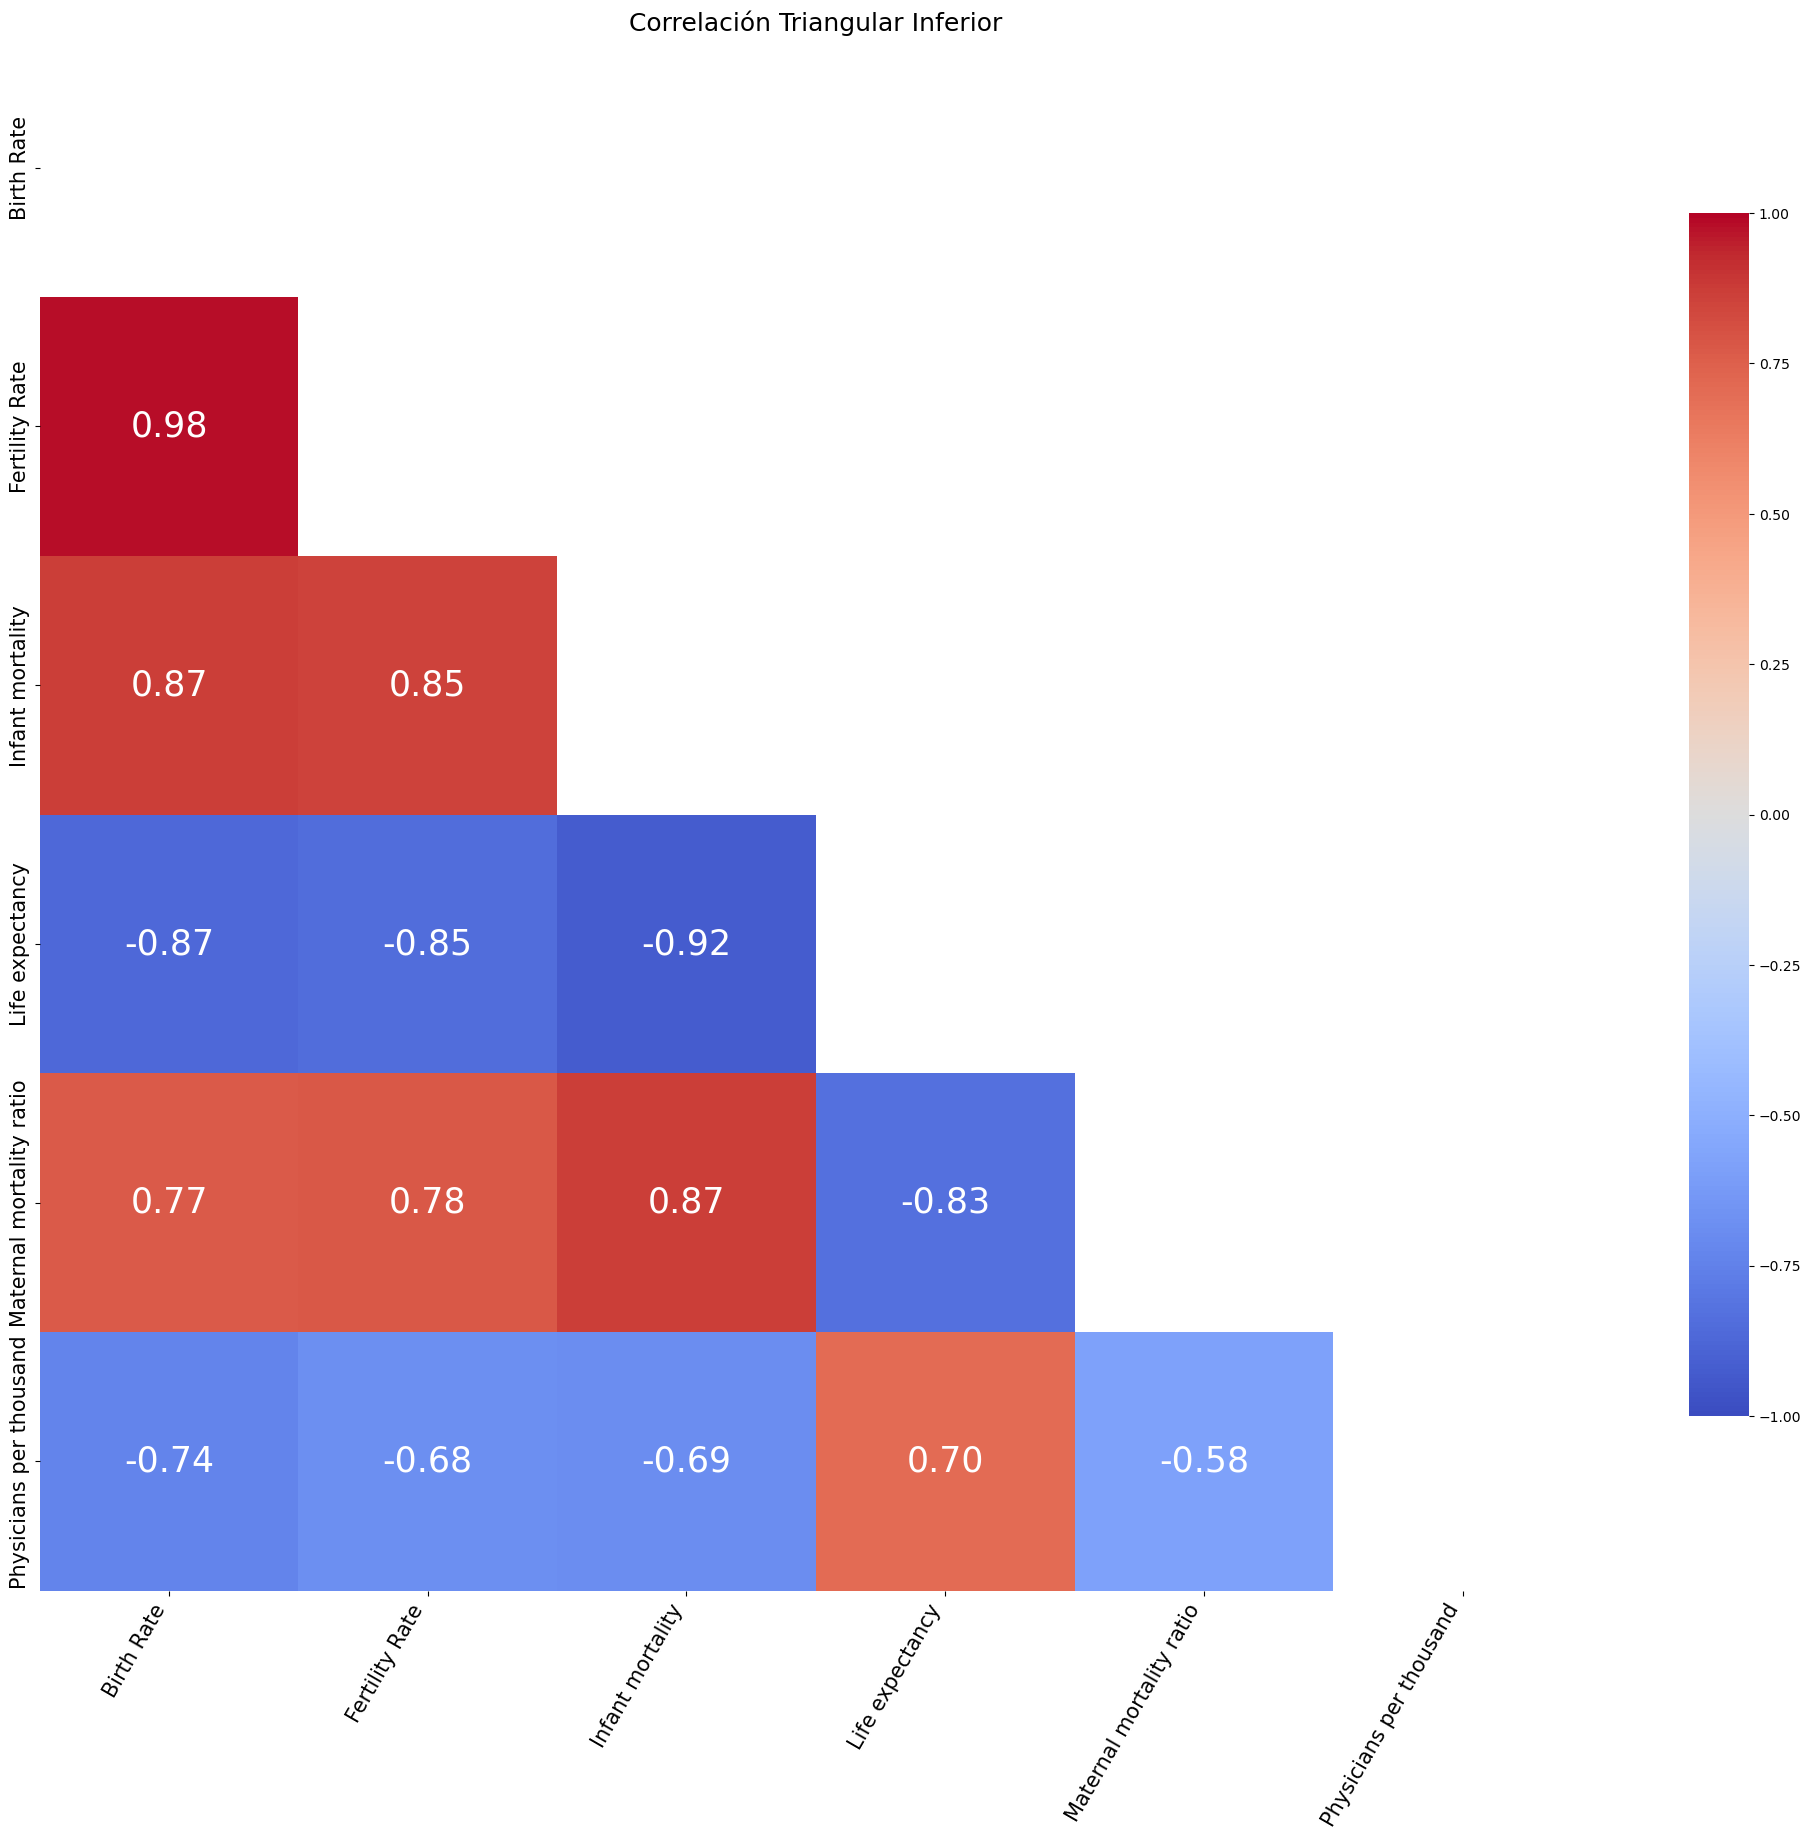

In [22]:
def plot_correlation_matrix(df, title="Matriz de Correlación", half=False):
    corr = df.corr(numeric_only=True)
    
    if half:
        mask = np.triu(np.ones_like(corr, dtype=bool))
    else:
        mask= None
    
    plt.figure(figsize=(20, 18)) # Tamaño 
    sns.heatmap(
        corr,
        mask=mask,
        annot= True,
        fmt=".2f",
        annot_kws={"size": 25}, # Fuente en los números
        cmap= "coolwarm",
        vmin= -1,
        vmax= 1,
        square= True,
        cbar_kws= {"shrink": 0.75}
    )
    
    plt.title(title, fontsize= 18)
    plt.xticks(rotation=60, ha='right', fontsize=15) # Más ángulo
    plt.yticks(fontsize= 15)
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(df, title="Correlación Completa")
plot_correlation_matrix(df, title="Correlación Triangular Inferior", half=True)

## conclusiones
Algunos factores, como la tasa de fertilidad y la mortalidad infantil, pueden mostrar una correlación directa o inversa con otros indicadores de salud y desarrollo.
Los datos pueden ser útiles para tomar decisiones informadas en áreas como salud pública, educación y políticas sociales.


# **Actividad N° 2**
De las variables codificadas numéricamente, ¿hay pares de ellas en la que parezca
haber correlación? ¿Para cuál(es) de ellas se observa más claramente?. Elige 2 pares
de variables.

# **Actividad N° 3**
Considera los dos pares de variables anteriores y elimina en cada caso los faltantes
y atípicos. Justifica en cada caso tu procedimiento.

# **Actividad N° 4**
Construye un gráfico para verificar la correlación entre estas variables, ahora con los datos preparados. Compara con lo obtenido anteriormente.

# **Actividad N° 5**
Realiza lo mismo para comparar la cantidad de médicos por cada mil personas y la
esperanza de vida. ¿Qué puedes concluir?

# **Actividad N° 6**
Construye un gráfico para representar la población total de los países y su producto
interno bruto. Prepara los datos y escoge el gráfico adecuado (si esnecesario, limpia y/o transforma los datos). Justifica.

# **Actividad N° 7**
Escoge otro par de datos, limpialos, prepáralos y analiza suposible relación Justifica utilizando las herramientas vistas y gráficos adecuados.